In [1]:
!pip install pyspark



In [2]:
import pyspark
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('MovieLens').getOrCreate()

In [3]:
ratings = spark.read.option("header", "true").csv("ml-25m/ratings.csv")
ratings.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    296|   5.0|1147880044|
|     1|    306|   3.5|1147868817|
|     1|    307|   5.0|1147868828|
|     1|    665|   5.0|1147878820|
|     1|    899|   3.5|1147868510|
+------+-------+------+----------+
only showing top 5 rows



In [8]:
movies = spark.read.option("header", "true").csv("ml-25m/movies.csv")
movies.show(5)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows



In [9]:
movies.createOrReplaceTempView("Movies")
ratings.createOrReplaceTempView("Ratings")

In [10]:
dataframe=spark.sql("select r.userId,m.movieId,m.genres,r.rating from Movies m inner join Ratings r on r.movieId=m.movieId").show()

+------+-------+--------------------+------+
|userId|movieId|              genres|rating|
+------+-------+--------------------+------+
|     1|    296|Comedy|Crime|Dram...|   5.0|
|     1|    306|               Drama|   3.5|
|     1|    307|               Drama|   5.0|
|     1|    665|    Comedy|Drama|War|   5.0|
|     1|    899|Comedy|Musical|Ro...|   3.5|
|     1|   1088|Drama|Musical|Rom...|   4.0|
|     1|   1175|Comedy|Drama|Romance|   3.5|
|     1|   1217|           Drama|War|   3.5|
|     1|   1237|               Drama|   5.0|
|     1|   1250| Adventure|Drama|War|   4.0|
|     1|   1260|Crime|Film-Noir|T...|   3.5|
|     1|   1653|Drama|Sci-Fi|Thri...|   4.0|
|     1|   2011|Adventure|Comedy|...|   2.5|
|     1|   2012|Adventure|Comedy|...|   2.5|
|     1|   2068|Drama|Fantasy|Mys...|   2.5|
|     1|   2161|Adventure|Childre...|   3.5|
|     1|   2351|               Drama|   4.5|
|     1|   2573|       Drama|Musical|   4.0|
|     1|   2632|Adventure|Drama|M...|   5.0|
|     1|  

In [11]:
dataframe=spark.sql("select r.userId,m.movieId,m.genres,r.rating from Movies m,Ratings r where r.movieId=m.movieId").show()

+------+-------+--------------------+------+
|userId|movieId|              genres|rating|
+------+-------+--------------------+------+
|     1|    296|Comedy|Crime|Dram...|   5.0|
|     1|    306|               Drama|   3.5|
|     1|    307|               Drama|   5.0|
|     1|    665|    Comedy|Drama|War|   5.0|
|     1|    899|Comedy|Musical|Ro...|   3.5|
|     1|   1088|Drama|Musical|Rom...|   4.0|
|     1|   1175|Comedy|Drama|Romance|   3.5|
|     1|   1217|           Drama|War|   3.5|
|     1|   1237|               Drama|   5.0|
|     1|   1250| Adventure|Drama|War|   4.0|
|     1|   1260|Crime|Film-Noir|T...|   3.5|
|     1|   1653|Drama|Sci-Fi|Thri...|   4.0|
|     1|   2011|Adventure|Comedy|...|   2.5|
|     1|   2012|Adventure|Comedy|...|   2.5|
|     1|   2068|Drama|Fantasy|Mys...|   2.5|
|     1|   2161|Adventure|Childre...|   3.5|
|     1|   2351|               Drama|   4.5|
|     1|   2573|       Drama|Musical|   4.0|
|     1|   2632|Adventure|Drama|M...|   5.0|
|     1|  

In [19]:
spark.sql("""select count(r.rating) CountRatings,m.title as MovieName from Movies m 
inner join Ratings r on r.movieId=m.movieId 
group by m.title order by count(r.rating) desc limit 5""").show()


+------------+--------------------+
|CountRatings|           MovieName|
+------------+--------------------+
|       81491| Forrest Gump (1994)|
|       81482|Shawshank Redempt...|
|       79672| Pulp Fiction (1994)|
|       74127|Silence of the La...|
|       72674|  Matrix, The (1999)|
+------------+--------------------+



In [21]:
spark.sql("""select r.rating MostRated,m.genres from Movies m 
inner join Ratings r on r.movieId=m.movieId  
order by r.rating desc limit 5""").show()


+---------+--------------------+
|MostRated|              genres|
+---------+--------------------+
|      5.0|Adventure|Drama|S...|
|      5.0|      Comedy|Romance|
|      5.0|      Horror|Mystery|
|      5.0|              Horror|
|      5.0|Drama|Horror|Thri...|
+---------+--------------------+



In [12]:
spark.sql("""select count(*) Frequentusers,userId from Movies m 
inner join Ratings r on r.movieId=m.movieId 
where CAST(TO_DATE(FROM_UNIXTIME(r.timestamp))as date)>CAST(TO_DATE(FROM_UNIXTIME(r.timestamp))as date) - interval '1' week 
group by userId 
order by count(*) desc   limit 5""").show()

+-------------+------+
|Frequentusers|userId|
+-------------+------+
|        32202| 72315|
|         9178| 80974|
|         8913|137293|
|         7919| 33844|
|         7488| 20055|
+-------------+------+



In [16]:
table= spark.sql("""

select m.genres,avg(r.rating) as AvgOfRatings  from movies m
inner join Ratings r on r.movieId=m.movieId
group by m.genres order by AvgOfRatings desc limit 10""")

table.show()
plot=table.toPandas()


+--------------------+------------+
|              genres|AvgOfRatings|
+--------------------+------------+
|Comedy|Crime|Dram...|         5.0|
|Action|Drama|Myst...|         5.0|
|Adventure|Drama|F...|         5.0|
|Children|Comedy|D...|         5.0|
|Fantasy|Horror|Ro...|         5.0|
|Adventure|Fantasy...|         5.0|
|Action|Comedy|Mys...|         5.0|
|Adventure|Drama|R...|         5.0|
|Animation|Crime|M...|       4.625|
|Action|Children|D...|         4.5|
+--------------------+------------+



<AxesSubplot:xlabel='AvgOfRatings', ylabel='genres'>

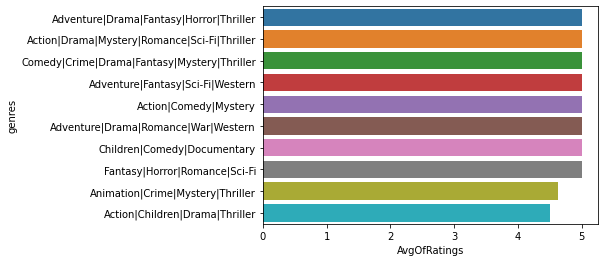

In [18]:
sns.barplot(x="AvgOfRatings",y = plot.genres,data=plot)

In [1]:
pwd

'C:\\Users\\EnesA'